## **Визуализация и анализ исправных и дефектных подшипниковых узлах**

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import math

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import FormatStrFormatter

Загружаем данные и даем им имена. 

В качестве исходных данных используется набор данных Data of rotary machine defects, взятых из Kaggle, который представляет собой результаты эксперимента по выявлению дефектов в подшипниковых узлах жидкостного трения. Время эксперимента 10 мин. Частота получения данных о колебаниях ротора 1000 сиг/сек. Частота съема данных о температуре 1 сиг/сек. 

Первая цифра в названии файла указывает на номер эксперимента, а вторая на класс дефекта. Соответствие номера дефекта и его вида:

‒ 1 - нет дефектов,

‒ 2 - несоосность в муфте,

‒ 3 - наличие дисбаланса,

‒ 4 - втулка с дефектами. 

Задача: понять, каким образом меняются параметры системы в подшибниках без дефектов и с ними.



In [3]:
no_def = pd.read_csv('data_3_1.csv')
no_def.name = 'нет дефектов'

imbalance = pd.read_csv('data_4_2.csv')
imbalance.name = 'наличие дисбаланса'

muft3 = pd.read_csv('data_3_3.csv')
muft3.name = 'несоосность в муфте 3 эксперимент'

muft4 = pd.read_csv('data_4_3.csv')
muft4.name = 'несоосность в муфте 4 эксперимент'

df = pd.read_csv('data_4_4.csv')
df.name = 'втулка с дефектами'



Внимательно проматриваем содержимое данных на количество параметров и полноту данных.

In [30]:
no_def.info()  # 9 parameters, full amount
imbalance.info()
muft3.info()
muft4.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

Все значения являются вещественными (float64). Разберем, что означает каждый из параметров:

* Fluctuations_X_in_the_left_bearing == горизонтальные колебания в левом подшипнике
* Fluctuations_Y_in_the_left_bearing == вертикальные колебания в левом подшипнике 
* Fluctuations_X_in_the_right_bearing == горизонтальные колебания в правом подшипнике
* Fluctuations_Y_in_the_right_bearing == вертикальные колебания в правом подшипнике подшипнике
* Fluctuations_X_in_the_left_bearing_smooth == горизонтальные колебания в левом подшипнике с учетом сглаживания
* Fluctuations_Y_in_the_left_bearing_smooth == вертикальные колебания в левом подшипнике с учетом сглаживания
* Fluctuations_X_in_the_right_bearing_smooth == горизонтальные колебания в правом подшипнике с учетом сглаживания
* Fluctuations_Y_in_the_right_bearing_smooth == вертикальные колебания в правом подшипнике подшипнике с учетом сглаживания
* Temperature_in_the_left_bearing == температура в левом подшипнике
* Temperature_in_the_right_bearing == температура в правом подшипнике



In [31]:
no_def.describe()

#similarly for other
#imbalance.describe()
#muft3.describe()
#muft4.describe()
#df.describe()


,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.00000,601000.000000,601000.000000,601000.000000
mean,5.572306,6.605890,5.685482,7.307183,5.572309,6.605893,5.68548,7.307180,1115.218973,1103.213705
std,0.064301,0.086101,0.097503,0.087153,0.046875,0.063904,0.08660,0.074574,4.407773,3.363114
min,5.177000,6.037000,5.222000,6.785000,5.346000,6.290000,5.43000,7.012000,1100.852000,1094.516000
25%,5.531000,6.557000,5.609000,7.243000,5.534000,6.563000,5.60900,7.244000,1112.894000,1101.021000
50%,5.572000,6.603000,5.684000,7.297000,5.572000,6.600000,5.68200,7.295000,1116.167000,1103.930000
75%,5.616000,6.661000,5.764000,7.372000,5.613000,6.656000,5.76100,7.371000,1118.718000,1105.971000
max,6.119000,7.388000,6.396000,8.131000,5.816000,6.952000,6.01800,7.679000,1120.780000,1107.761000


## Анализ числовых (вещественных) параметров

Далее сравним эффективность визуализации распределения данных с помощью ящика с усами и с помощью гистограммы на примере 10 вещественных признаков. При первом приближении, становится понятно, первые 8 и 2 последних вещественных признаков имеют разный диапазон, так как обозначают разные параметры, такие как колебания и темпеатура. Распределение этих параметров интересно посмотреть в контексте значений целевой функции, т.е. посмотреть сколько значений признак принимает на норме и ненорме.

In [49]:
def hist_for_atribute_set(df, labels, ax, bin_num=25, df2= None, 
                          ylim=None, ylabel=None, y_scale='linear'):
      
    for i, col in enumerate(labels):
         for j, row in enumerate(col):
            ax[i][j].set_yscale(y_scale)   
            ax[i][j].tick_params(labelsize=10)
            ax[i][j].set_xlabel(row)

            # уберем лишние границы графика
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].grid()

            ax[i][j].hist(df[row], bin_num, density=False, color='#9932cc', alpha=.75, label = df.name) # синий 
            if df2 is not None:
                ax[i][j].hist(df2[row], bin_num, density=False, color='#ff4d00', alpha=.45, label = df2.name) # красный '#e41a1c'
            ax[i][j].legend()
            
  # если графиков меньше чем есть в сетке, убираем лишние оси
    len_labels = len(labels)
    len_ax = len(ax)
    if len_labels < len_ax:
        for ax in ax[len_labels : len_labels + (len_ax - len_labels)]:
            ax.axis('off')

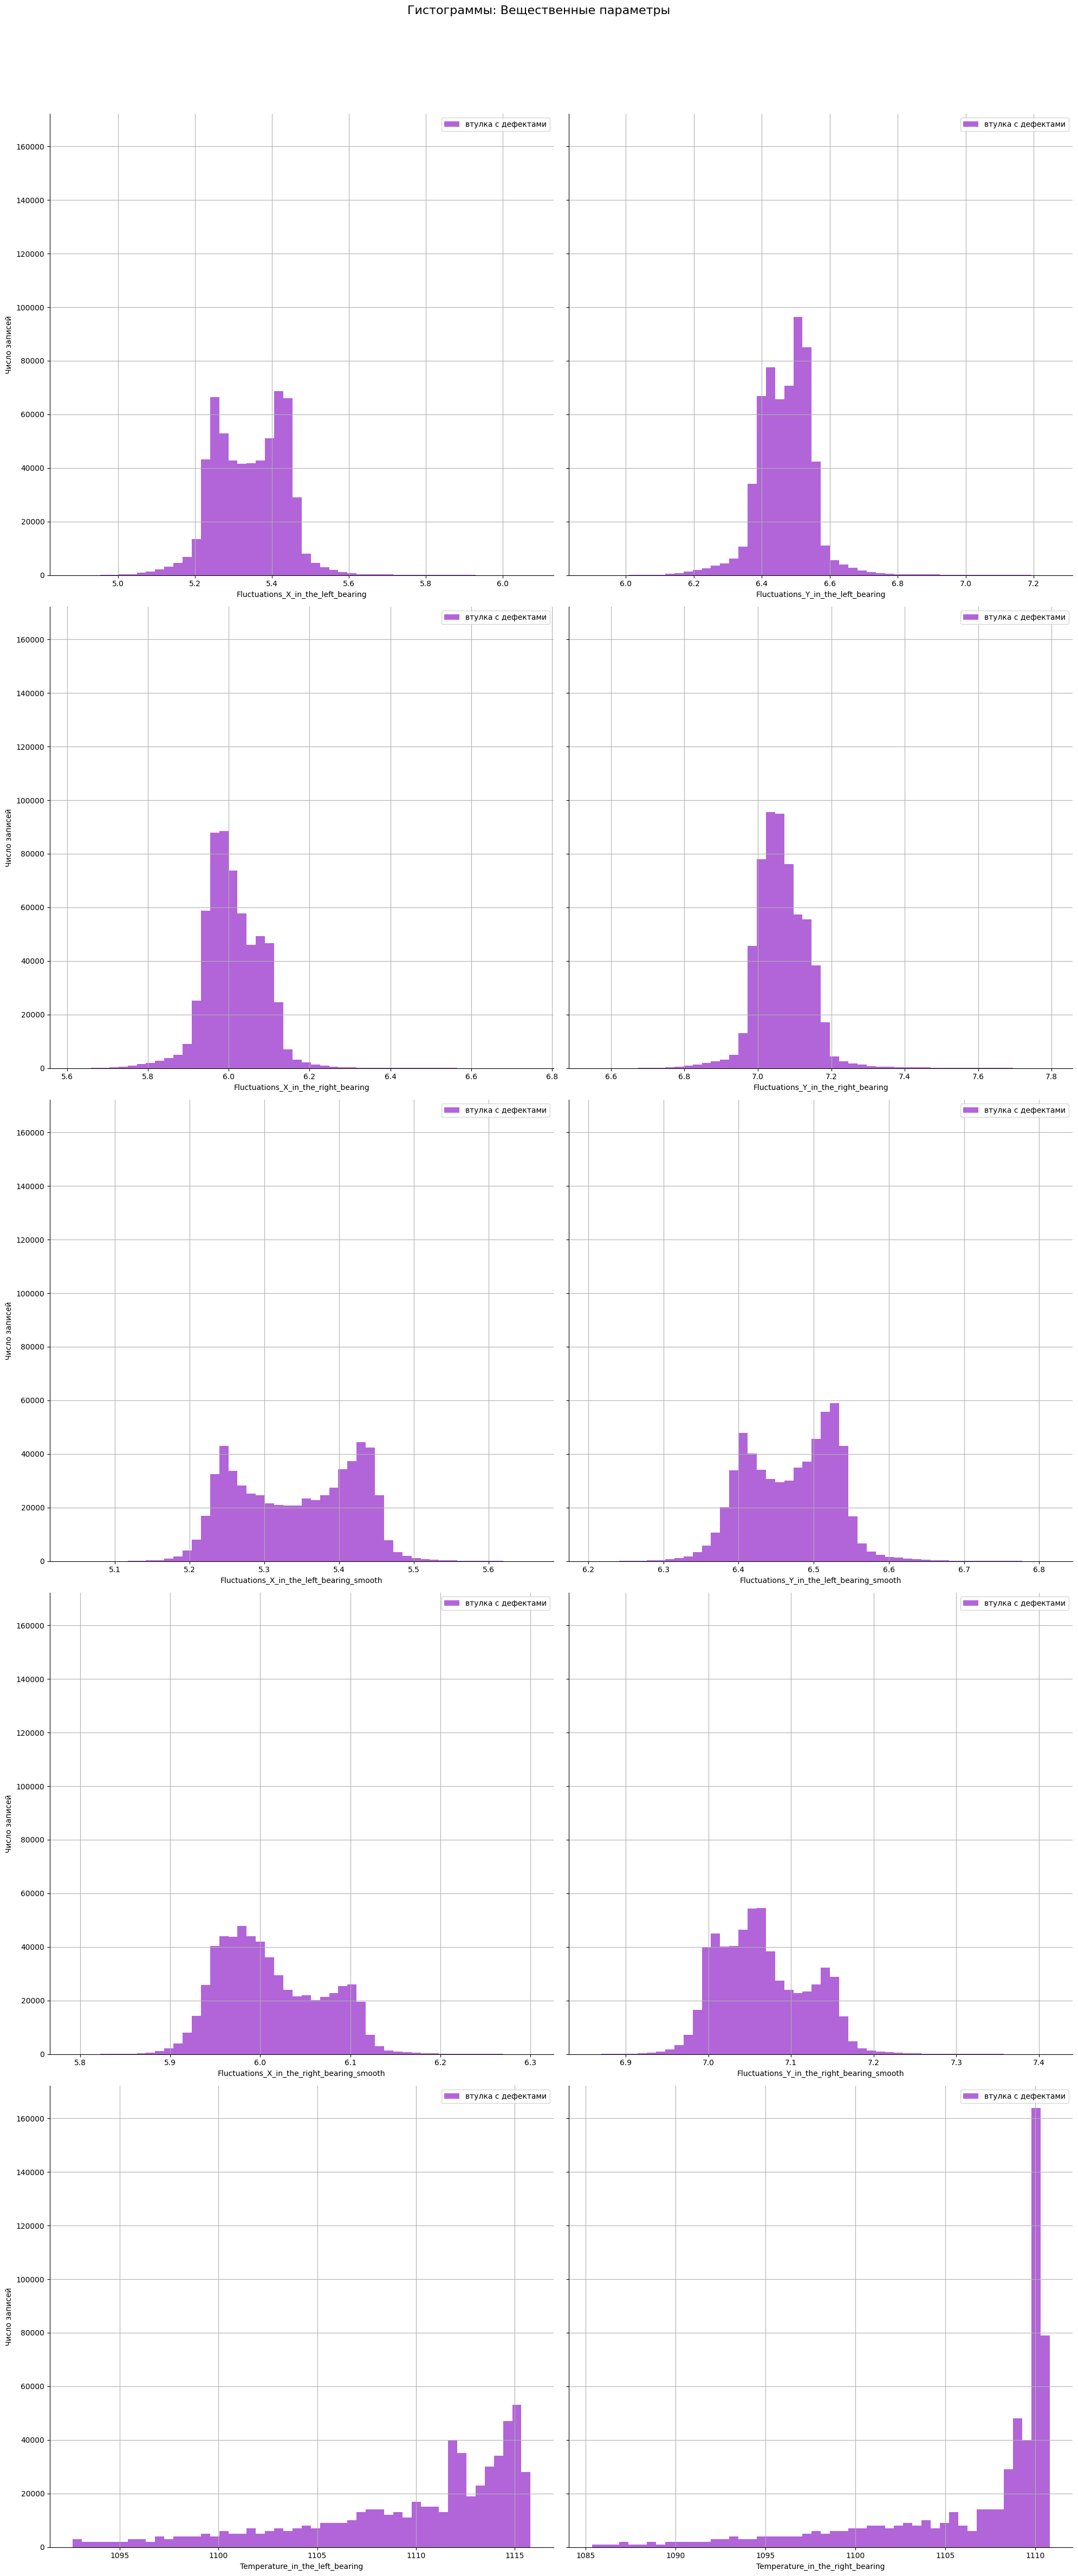

In [112]:
fig, ax = plt.subplots(nrows=5, ncols=2, sharey=True, figsize=(20, 50))
labels = [['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing'],
          ['Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing'],
          ['Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth'],
          ['Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth'],
          ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']]

#hist_for_atribute_set(no_def, labels, ax, bin_num=50, y_scale='linear')
#also can be replace first parameter for other data
#hist_for_atribute_set(imbalance, labels, ax, bin_num=50, y_scale='linear')
#hist_for_atribute_set(muft3, labels, ax, bin_num=50, y_scale='linear')
#hist_for_atribute_set(muft4, labels, ax, bin_num=50, y_scale='linear')
hist_for_atribute_set(df, labels, ax, bin_num=50, y_scale='linear')

for j, row in enumerate(ax):
    ax[j][0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16)
fig.tight_layout(rect=[0, .03, 1, .95])

#### Нет дефектов
Нанную статистику мы берем за основную и считаем норомой и в дальнейшем любое сравнение будет проводитя в зависимости от данного набора данных. Распределение данных являются нормальными. Можно заметить, что при увеличении температуры, записей становится больше.

#### Наличие дисбаланса
Если изучить гистограммы построенные на следующих данных, то можно обнаружить вбросы. В таких измерениях как температура в левом подшипнике, а также аномально батрый рост записей в пером измерении, который противоечит нормальному распределнию.

#### Несоосность в муфте
При анализе гитограммы температуры в левом подшипнике наблюдается волнообразный рост и спад температур.

#### Втулка с дефектами
Если сравнить уже рассмотренные гистограммы с данной, то можно заметить, что записи стаои распределяться более равномерно, без особых скачков. Также при изучении температуры в левом подшипнике виден аномальный скачек записей на одном участеке.

Подробный анализ эксперимента можно будет провести, когда будет осуществлено сравнение гистаграм с нормой, данный инструментал будет приведен после рассмотрения множест ящиков с усами.

#### На основе этих выводов определим наши дальнейшие шаги:

1.Сравним, можно ли сделать такие выводы используя boxplot (ящик с усами)

2.Посмотрим на то, как распределены значения в зависимости от факта наличия дефекта (сложно сделать с помощью boxplot).

3.Посмотрим, как меняются эти значения этих параметров во времени, т.е. построим обычные timelines.

In [5]:
# аналогичным образом можно определить функцию для построения множества ящиков с усами.
def boxplot_for_atribute_set(df, labels, ax, ylim=None, ylabel=None):
  flierprops = dict(marker='o', markersize=3)
  
  for i, col in enumerate(labels):
    for j, row in enumerate(col):
        ax[i].boxplot(df[row], positions=[j + 1], flierprops=flierprops)
        ax[i].tick_params(labelsize=10)
        ax[i].set_xticks(np.arange(len(col)) + 1, col, rotation=90)
            
        if ylim:
          ax[i].set_ylim(ylim)

        if ylabel:
          ax[i].set_ylabel(ylabel, fontsize=10)

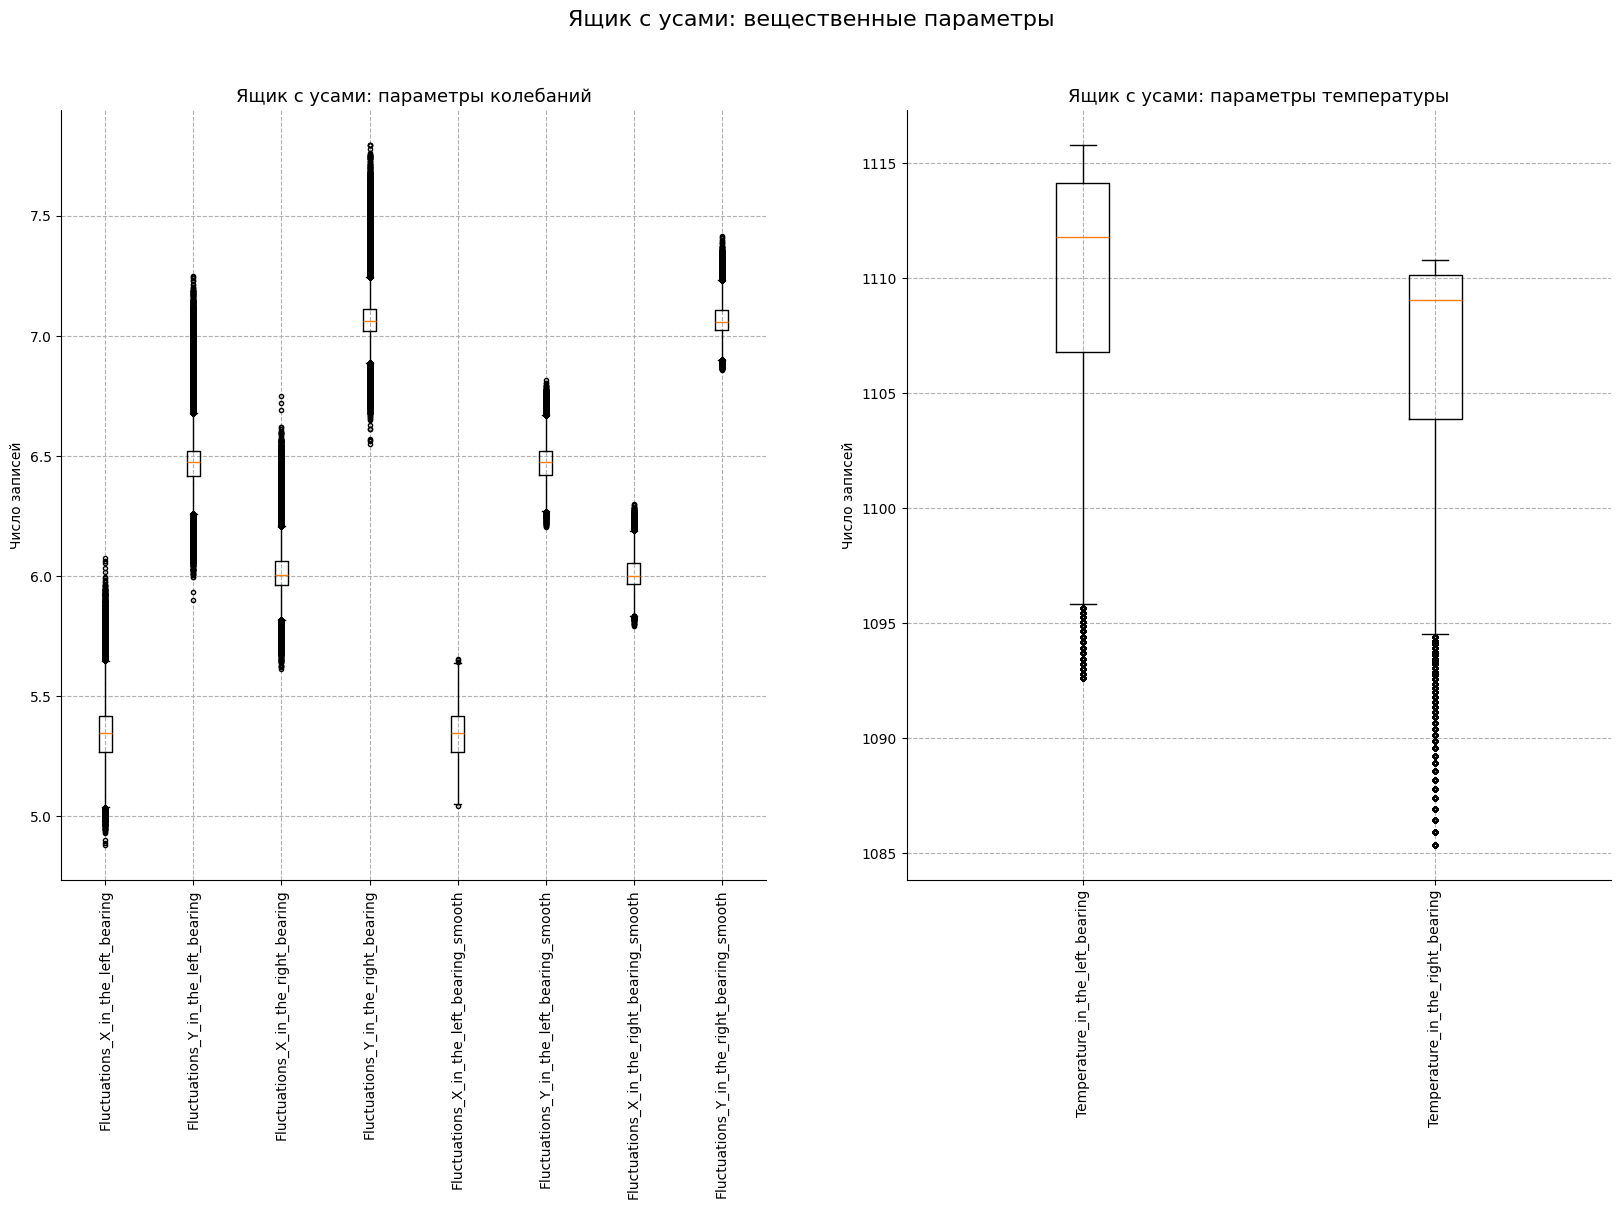

In [8]:
labels = [['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing',
          'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing',
          'Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth',
          'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth'],
          ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']]

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(20, 10))
#boxplot_for_atribute_set(no_def, labels, ax, ylabel = 'Число записей')
#boxplot_for_atribute_set(imbalance, labels, ax, ylabel = 'Число записей')
#boxplot_for_atribute_set(muft3, labels, ax, ylabel = 'Число записей')
#boxplot_for_atribute_set(muft4, labels, ax, ylabel = 'Число записей')
boxplot_for_atribute_set(df, labels, ax, ylabel = 'Число записей')



ax[0].set_title('Ящик с усами: параметры колебаний', fontsize=13)
ax[1].set_title('Ящик с усами: параметры температуры', fontsize=13)
fig.suptitle('Ящик с усами: вещественные параметры', fontsize=16)

for axes in ax:
    axes.spines['right'].set_visible(False)
    axes.spines['top'].set_visible(False)
    axes.grid(linestyle='--' )

Данные были распределены на 2 графика, с учетом разных характеристик. Первый - колебания, второй - температура.
Трактовать 'ящики' с усами проще после выполненного анализа данных с помощью гистограмм. 
По данной визуализации удобно определять вбросы, которые обозначаются точкой. И на различных данных можно это увидеть. 

`Здесь мы рассмотрели втулку с дефектами и вбросы прослеживаются в большей части пармантров, но особенно их много при измерении температуры в правом подшипнике и горизонтальных колебаниях левого подшипника и вертикальных колебаниях правого. `

Теперь оценим распределение значение с учетом значения целевой функции. В принципе для этого можно строить для интересующего нас параметра 2 гистограммы рядом, но мы 'наложим' их друг на друга, так как данная визуализация будет наиболее информативной.

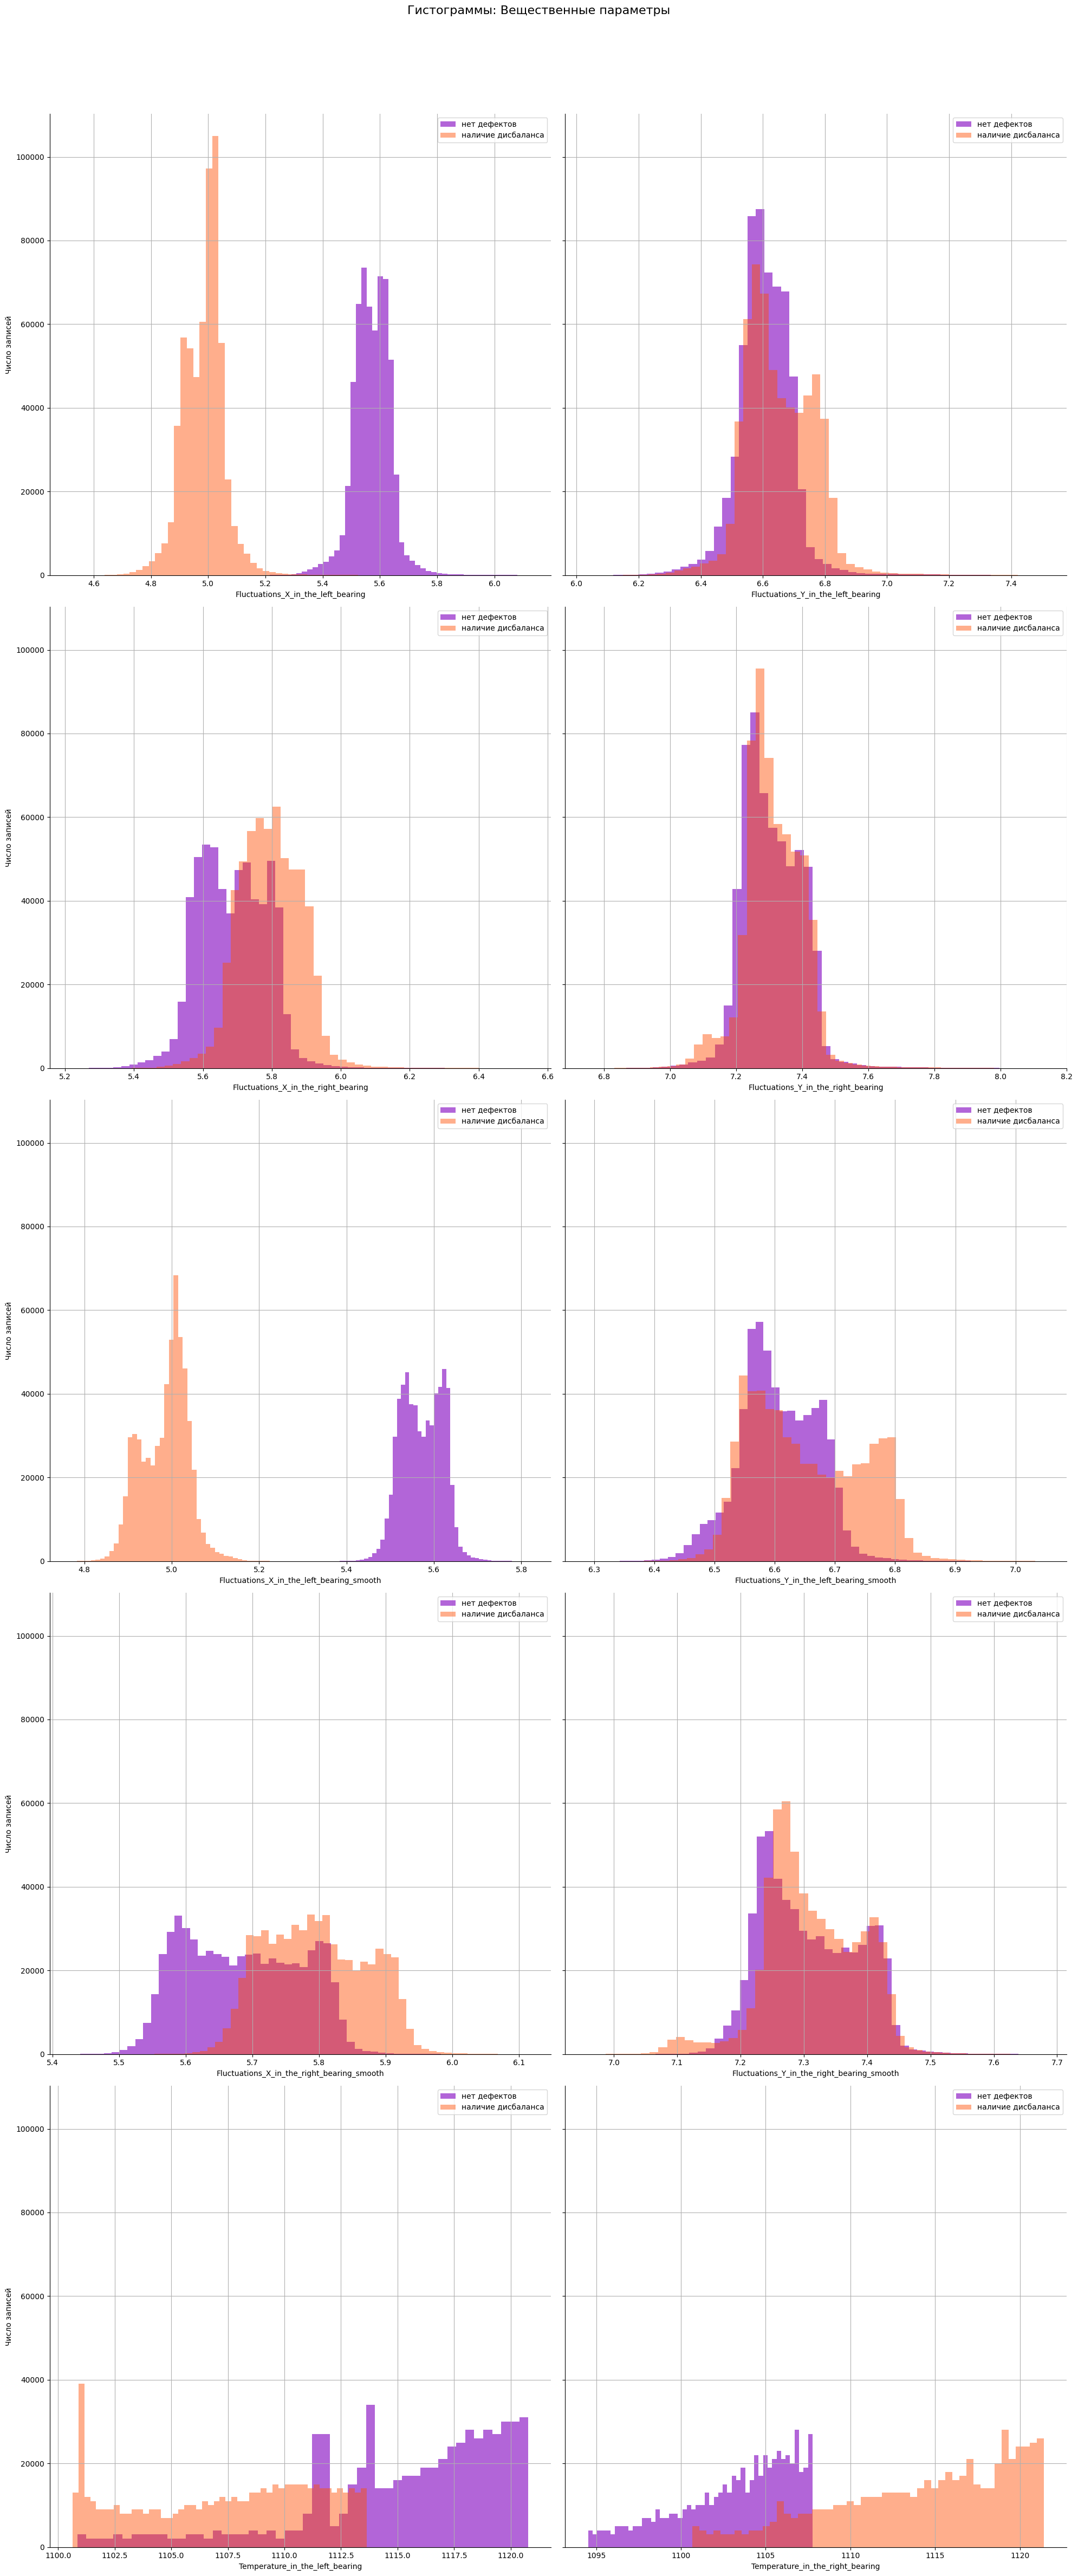

In [102]:
labels = [['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing'],
          ['Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing'],
          ['Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth'],
          ['Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth'],
          ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']]

fig, ax = plt.subplots(nrows=5, ncols=2, sharey=True, figsize=(20, 50))

hist_for_atribute_set(no_def, labels, ax, bin_num=50, df2=imbalance, y_scale='linear')
#hist_for_atribute_set(no_def, labels, ax, bin_num=50, df2=muft3, y_scale='linear')
#hist_for_atribute_set(no_def, labels, ax, bin_num=50, df2=muft4, y_scale='linear')
#hist_for_atribute_set(no_def, labels, ax, bin_num=50, df2=df, y_scale='linear')
#hist_for_atribute_set(muft3, labels, ax, bin_num=50, df2=muft4, y_scale='linear')
for j, row in enumerate(ax):
    ax[j][0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16)
fig.tight_layout(rect=[0, .03, 1, .95])



При различной групперивке данных было замечено следующие: 
* почти все гистограммы отноительно нормальной смещены, а честь из них повторяет форму распределения запесей, но также со смещением; 
* некоторая честь графиков имеет огромную кореляцию в значениях отноительно результатов экспериментов без дефектов, также были замечены варианты, когда происходил анамально большой рост запесей не сопоставимях с нормой.

# Линейные графики

Посмотрим на то, как меняются параметры со временем, чтоб провести наиболее точный анализ

In [57]:
df_x = pd.DataFrame() 
df_x['time_sec'] = range(0, 601000)

# линейные графики для множества параметров
def lineplot_for_atribute_set(df, df_2, labels, ax, ylim=None, ylabel=None):
    global df_x
    for i, col in enumerate(labels):
        ax[i].set_xlabel(col)
        ax[i].plot(df_x['time_sec'], df[col], color='#9932cc', linewidth=.65, label = df.name)
        ax[i].plot(df_x['time_sec'], df_2[col], color='#ff4d00', linewidth=.65, label = df_2.name)
        ax[i].legend()
        ax[i].grid()   
        
        if ylabel:
            ax[i].set_ylabel(ylabel, fontsize=13)

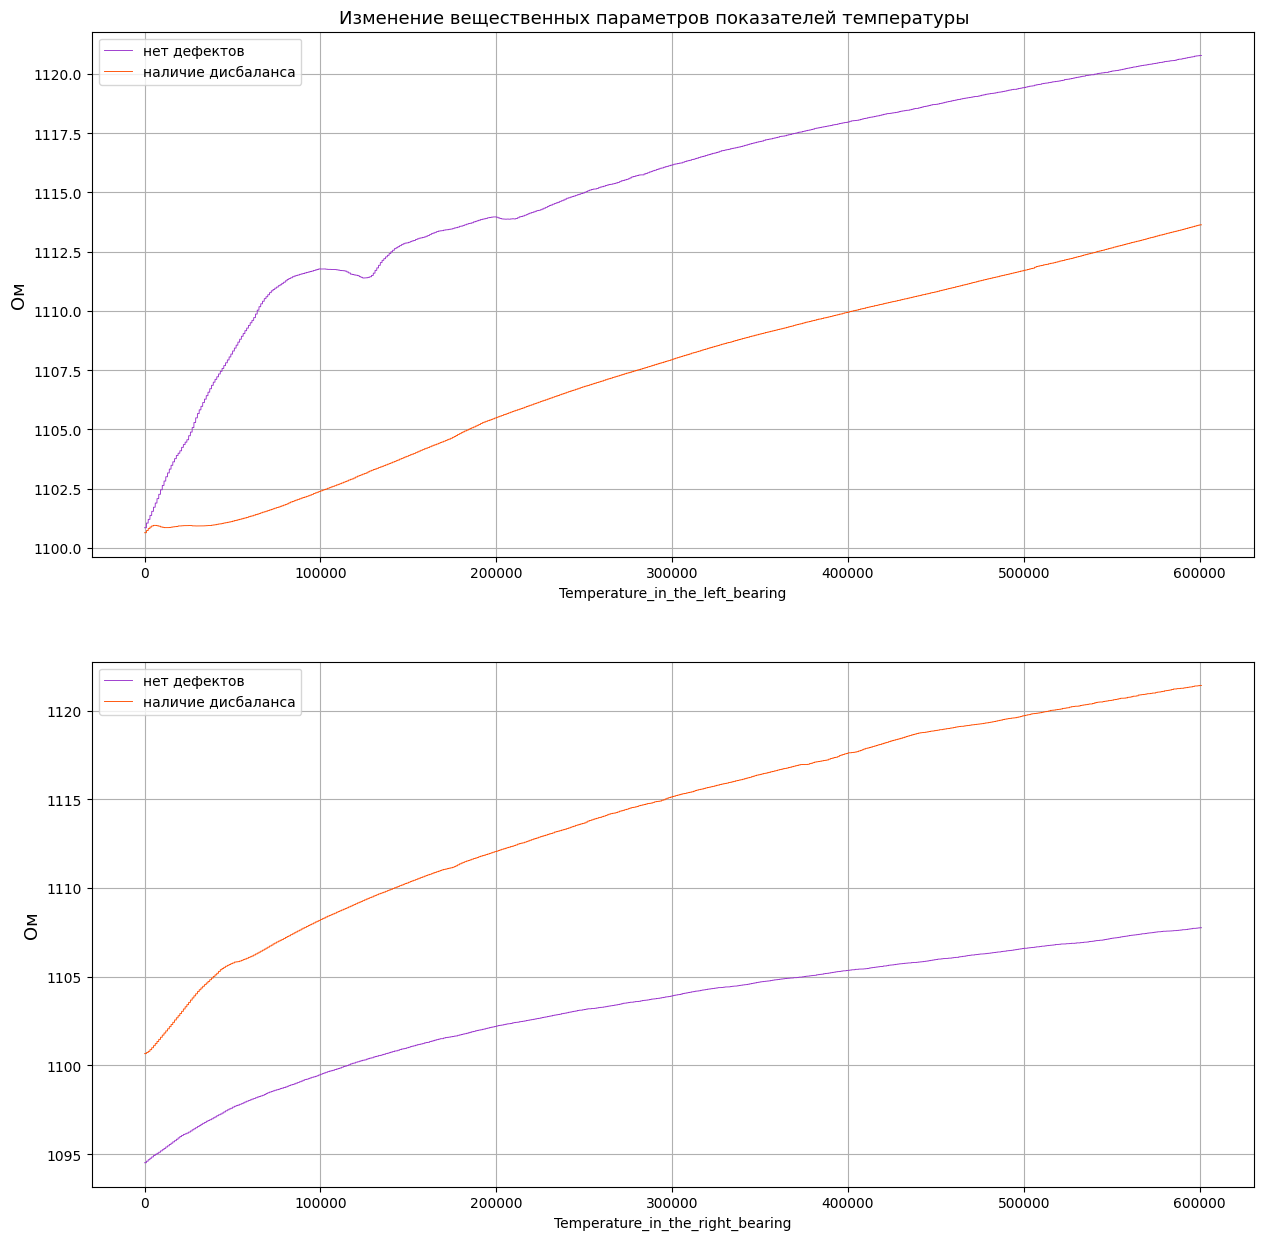

In [58]:
labels = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']

fig, ax = plt.subplots(nrows=2, ncols=1, sharey=False, sharex = False, figsize=(15, 15))

lineplot_for_atribute_set(no_def, imbalance, labels, ax, ylabel = "Ом")
#lineplot_for_atribute_set(no_def, muft3, labels, ax, ylabel = "Ом")
#lineplot_for_atribute_set(no_def, muft4, labels, ax, ylabel = "Ом")
#lineplot_for_atribute_set(no_def, df, labels, ax, ylabel = "Ом")


fig.suptitle('Изменение вещественных параметров показателей температуры', fontsize=13, y=.895)
plt.show()

Измерения температурных датчиков от измерения к измерению вегда меняются и ни при каком дефекте соотношения данных параметров не будут соответствовать нормальному, но могут ее пересекать или находится выше/ниже.

Далее, проведем двумерный анализ показателей для выявления корреляций и зависимостей между переменными.

In [85]:
def bar_for_atribute_set(df1, df2, label, ax, y_scale='linear'):
  d = dict()
  d['Norm'] = []
  d['defects'] = [] 

  attr_values = df[label].unique()
  x = np.arange(len(attr_values))  # the label locations
  width = .25  # the width of the bars
  multiplier = 0

  for attr_val in attr_values:
    attr_val_num_norm = df[df[label]==attr_val].shape[0]
    attr_val_num_ne_norm = df2[df2[label]==attr_val].shape[0]
    d['Norm'].append(attr_val_num_norm) 
    # print(f'Norm: {attr_val_num_norm}')
    d['defects'].append(attr_val_num_ne_norm)
    # print(f'Not a norm: {attr_val_num_ne_norm}')

  for attr, val in d.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=str(attr))
    ax.bar_label(rects, padding=3)
    multiplier += 1
  
  ax.set_yscale(y_scale)
  ax.set_xticks(x + width/2, attr_values)
  
  ax.set_xlabel(label)
  # уберем лишние границы графика
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.grid()    
  ax.legend()

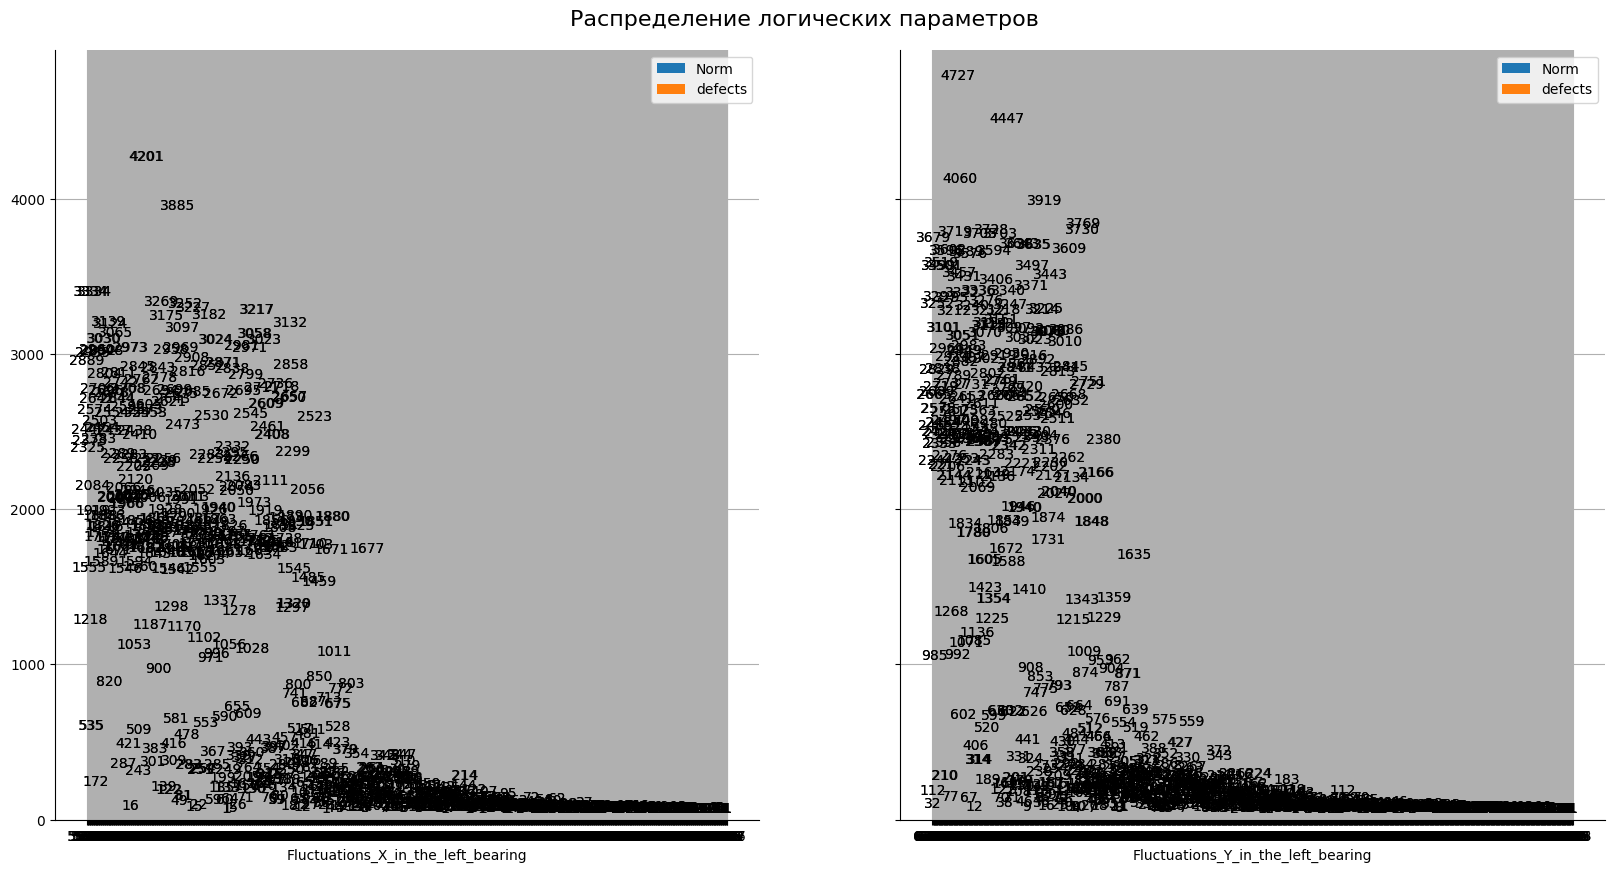

In [86]:
labels1 = ['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing']

# boolean_labels3 = ['Pump_state_bool']

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 10))
fig.suptitle('Распределение логических параметров', fontsize=16, y=.92)

axes = ax.flatten()
for i, col in enumerate(labels1):
  bar_for_atribute_set(no_def, df, col, axes[i], y_scale='linear')

In [92]:
# матрица корреляции намного симпатичнее выглядит в seaborn
def heatmap(df, ax, title):
  corr = df.corr()

  # пропустим пары со слабой корреляцией, попробуем поэкспериментировать с этой настройкой
  df_corr = corr[(corr>=.4) | (corr<=-.4)]

  # print(f'Empty columns: {get_empty_columns_names(df_corr)}')

  mask = np.triu(np.ones_like(corr))
  sns.heatmap(
    df_corr, 
    cbar=False, 
    mask=mask,
    ax=ax, 
    annot=True, 
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
  )

  ax.title.set_text(title)
  ax.tick_params(
    top=False,
    bottom=False,
    left=False,
    right=False,
  )

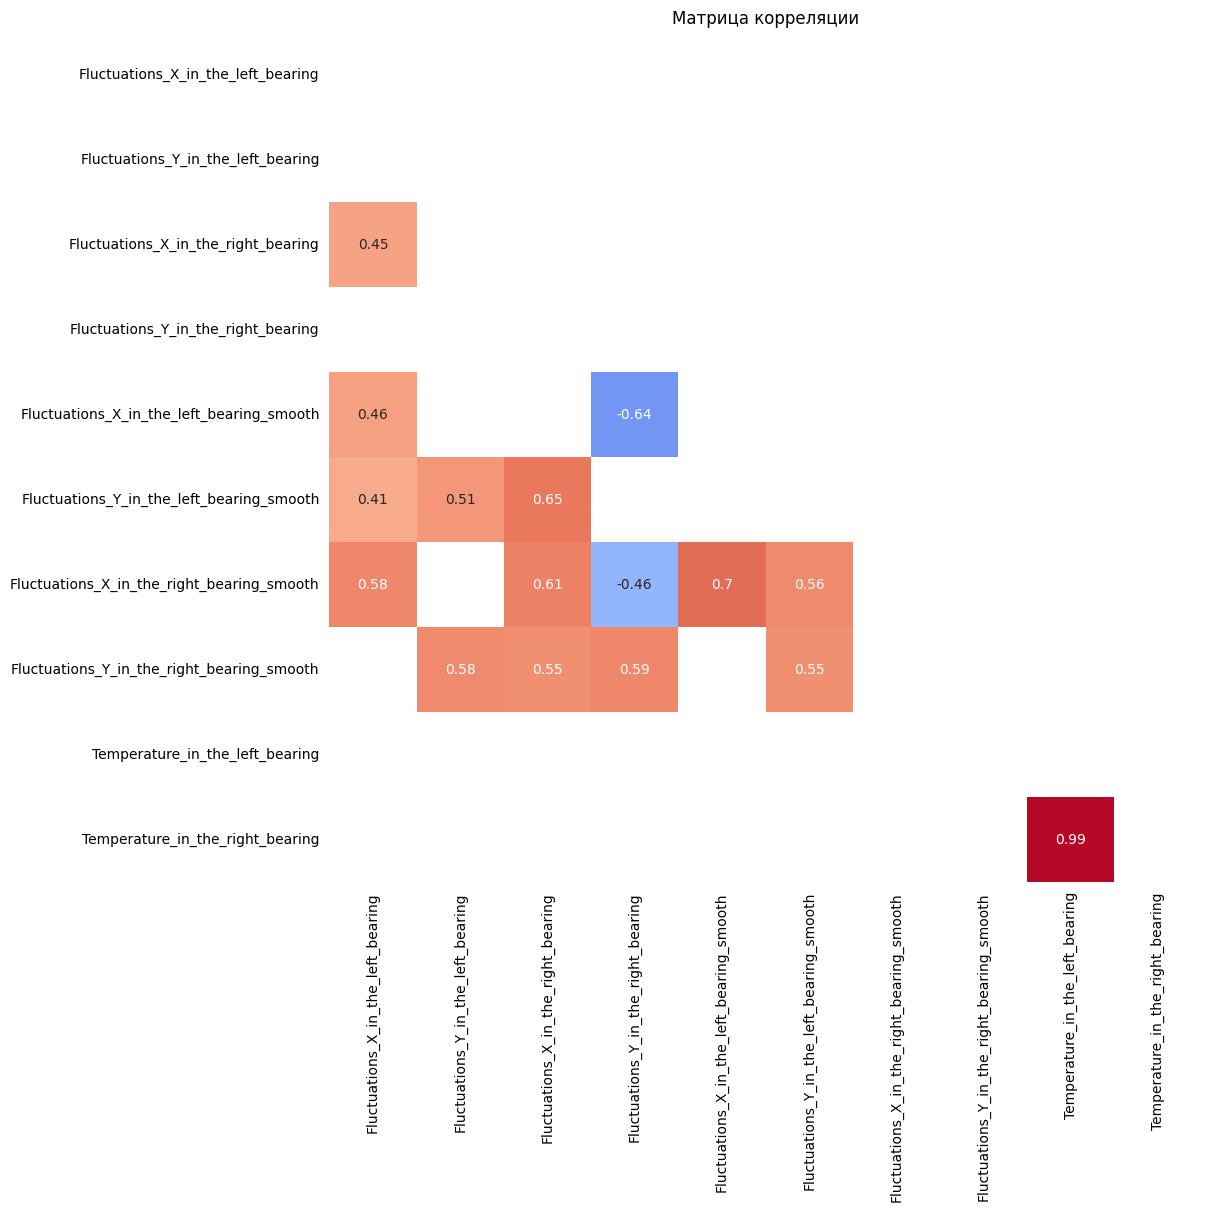

In [94]:
corr_labels =['Fluctuations_X_in_the_left_bearing', 'Fluctuations_Y_in_the_left_bearing',
              'Fluctuations_X_in_the_right_bearing', 'Fluctuations_Y_in_the_right_bearing',
              'Fluctuations_X_in_the_left_bearing_smooth', 'Fluctuations_Y_in_the_left_bearing_smooth',
              'Fluctuations_X_in_the_right_bearing_smooth', 'Fluctuations_Y_in_the_right_bearing_smooth',
              'Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing']

fig, ax = plt.subplots(figsize=(12, 12), constrained_layout=True)
hm = heatmap(no_def[corr_labels], ax, 'Матрица корреляции')

In [100]:
x = no_def[corr_labels].values

# нормализуем значения
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print(f'Explained variance: {pca.explained_variance_ratio_}\tSum: {pca.explained_variance_ratio_.sum()}')

Explained variance: [0.33986717 0.27804324 0.18137592]	Sum: 0.799286330514257


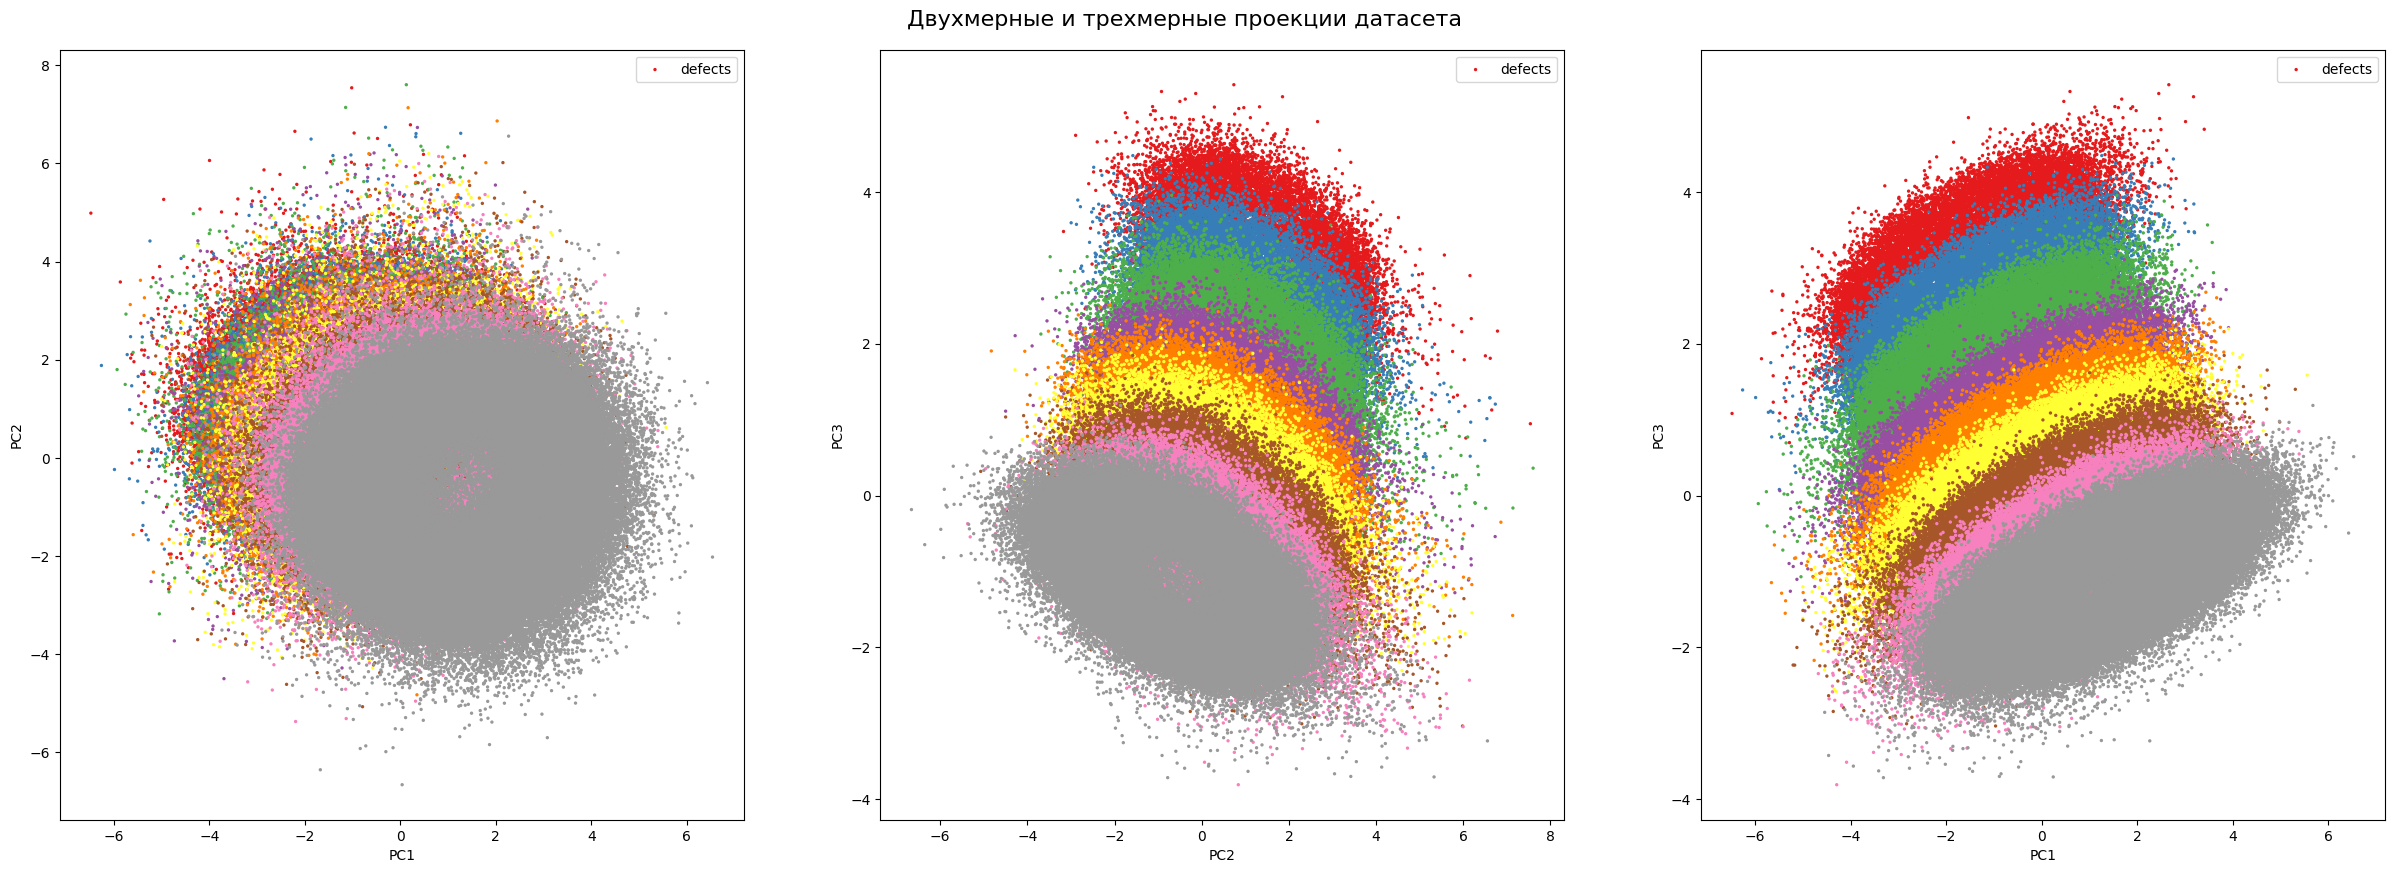

In [103]:
principalDf = pd.DataFrame(data=principalComponents , columns=['PC1', 'PC2', 'PC3'])

fig, ax_grid = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.suptitle('Двухмерные и трехмерные проекции датасета', fontsize=16, y=.92)

ax_grid[0].scatter(principalDf['PC1'], principalDf['PC2'], c=imbalance['Temperature_in_the_right_bearing'], cmap='Set1', s=2, label='defects')
ax_grid[0].set_xlabel('PC1')
ax_grid[0].set_ylabel('PC2')
ax_grid[0].legend()

ax_grid[1].scatter(principalDf['PC2'], principalDf['PC3'], c=imbalance['Temperature_in_the_right_bearing'], cmap='Set1', s=2, label='defects')
ax_grid[1].set_xlabel('PC2')
ax_grid[1].set_ylabel('PC3')
ax_grid[1].legend()

ax_grid[2].scatter(principalDf['PC1'], principalDf['PC3'], c=imbalance['Temperature_in_the_right_bearing'], cmap='Set1', s=2, label='defects')
ax_grid[2].set_xlabel('PC1')
ax_grid[2].set_ylabel('PC3')
ax_grid[2].legend()

#plt.colorbar()
plt.show()